In [1]:
import pandas as pd
import numpy as np
import os
import sys
# for reload self-defined modules
# from importlib import reload

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pprint import pprint

In [6]:
sys.path.append('/root/cma/machine_learning_practice/01_ml')
import myutil
# reload(myutil)

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# load data

In [8]:
# List files available
data_dir = '../00_data/hc/'
pprint(os.listdir(data_dir))

['simple_features_train.csv',
 'bureau.csv',
 '.ipynb_checkpoints',
 'simple_features_test.csv',
 'feature_matrix_spec_0505.csv',
 'previous_application.csv',
 'POS_CASH_balance.csv',
 'application_test.csv',
 'feature_matrix_spec.csv',
 'bayesian_trials_1000.csv',
 'feature_matrix_spec_0506.h5',
 'installments_payments.csv',
 'bureau_balance.csv',
 'sample_submission.csv',
 'application_train.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv']


In [119]:
# Training/Testingdata
with myutil.timer():
    df_train = pd.read_csv( data_dir + '/application_train.csv')
    df_test = pd.read_csv(data_dir + '/application_test.csv')
    df_prev = pd.read_csv(data_dir + '/previous_application.csv')

do - done in 12.9093s


In [10]:
print('Training data shape: ', df_train.shape)
print('Testing data shape: ', df_test.shape)

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


In [11]:
df_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# EDA-总体统计

- 统计各个行列的数据类型，obj num cate
- 统计Null比例


## 统计各个行列的数据类型

- 主要的col为数值型
- 字符型的col有16列，需要编码处理

In [12]:
print('dtypes of train data:')
df_train.dtypes.value_counts()

dtypes of train data:


float64    65
int64      41
object     16
dtype: int64

## null统计

null 比例超过0.5的col达到41.

In [13]:
df_null, col_drop = myutil.df_null_stat(df_train,0.5)

num of col null ratio>0.5: 41


In [14]:
df_null.head(5)

,null_ratio
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330


In [16]:
# myutil.df2md(df_null.head(5))

## describe

- df_desc,数值型特征
- df_desc_obj，字符型特征

In [17]:
df_desc = df_train.describe(percentiles=[0.5]).T
df_desc['null_ratio'] = 1 - df_desc['count'] / df_train.shape[0]
df_desc.sort_values(by = 'null_ratio', inplace=True)

In [19]:
df_desc.tail(5)
# myutil.df2md(df_desc.head(5))

,count,mean,std,min,50%,max,null_ratio
NONLIVINGAPARTMENTS_MEDI,93997.0,0.008651,0.047415,0.0,0.0000,1.0,0.694330
NONLIVINGAPARTMENTS_AVG,93997.0,0.008809,0.047732,0.0,0.0000,1.0,0.694330
COMMONAREA_AVG,92646.0,0.044621,0.076036,0.0,0.0211,1.0,0.698723
COMMONAREA_MEDI,92646.0,0.044595,0.076144,0.0,0.0208,1.0,0.698723
COMMONAREA_MODE,92646.0,0.042553,0.074445,0.0,0.0190,1.0,0.698723


In [20]:
df_desc_obj = df_train.describe(include=[np.object]).T
df_desc_obj['freq_ratio'] = df_desc_obj['freq'] / df_desc_obj['count']

In [21]:
df_desc_obj
# myutil.df2md(df_desc_obj)

,count,unique,top,freq,freq_ratio
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,0.904787
CODE_GENDER,307511,3,F,202448,0.658344
FLAG_OWN_CAR,307511,2,N,202924,0.659892
FLAG_OWN_REALTY,307511,2,Y,213312,0.693673
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526,0.811596
NAME_INCOME_TYPE,307511,8,Working,158774,0.51632
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391,0.710189
NAME_FAMILY_STATUS,307511,6,Married,196432,0.63878
NAME_HOUSING_TYPE,307511,6,House / apartment,272868,0.887344
OCCUPATION_TYPE,211120,18,Laborers,55186,0.261396


In [22]:
# 用info 显示描述信息
df_train.info()
# df_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- 贷款
    - 金额的分布
    - 年份，无
    - 期数的分布，推算
- 业务的增速，看不到
- 复贷率的分布
联合查询
- 贷款的用途, if has 
NAME_CASH_LOAN_PURPOSE
主表中没有
- 坏账率
- 哪些特征可以直接体现类似FICO信用分的指标意义
- EXT数据可能的语义，能否被内部其他数据所取代

- 利率
previous_application.csv RATE_INTEREST_PRIMARY


# 客户群体特征分析

分析客户的群体特征。

In [23]:
def groupby_target_ratio_plot(fe, target, df, size=(6, 4)):
    """
    对特征fe groupby，绘制子群体关于target的违约比例
    """
    df_fe = df.groupby(fe)[target].agg(['sum', 'count'])
    df_fe['ratio'] = df_fe['sum'] / df_fe['count']
    df_fe.sort_values(by='ratio', inplace=True, ascending=False)

    plt.figure(figsize=size)
    sns.barplot(df_fe.index, df_fe.ratio)
    plt.title('default ratio vs {}'.format(fe))

## 标签分布

TARGET==1，表示贷款人在已经发生的Y分期中，只要有一次逾期超过X天。注意，这是贷中状态，贷款尚未偿还完毕。因此当前的“逾期”并不等同于“违约”

- 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
- 0 - all other cases

可以看出，违约用户是少数，占比0.08


In [24]:
df_train.TARGET.value_counts()/df_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

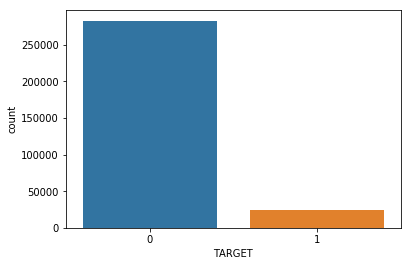

In [25]:
sns.countplot(df_train.TARGET)

## 性别分布

注意到

- 性别有3个分类
- XNA可能表示第三性别，或者不确定，数量极少，可以忽略
- 女性几乎是男性数量的2倍
可能的原因是女性受接受金融服务的渠道比男性少，因此更需要HomeCredit。

性别与违约的关系：**男性的违约概率显著高于女性**


In [30]:
pd.value_counts(df_train.CODE_GENDER) / df_train.shape[0]

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

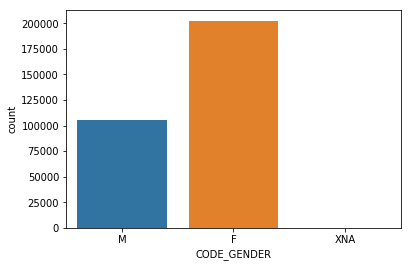

In [31]:
sns.countplot(df_train.CODE_GENDER)

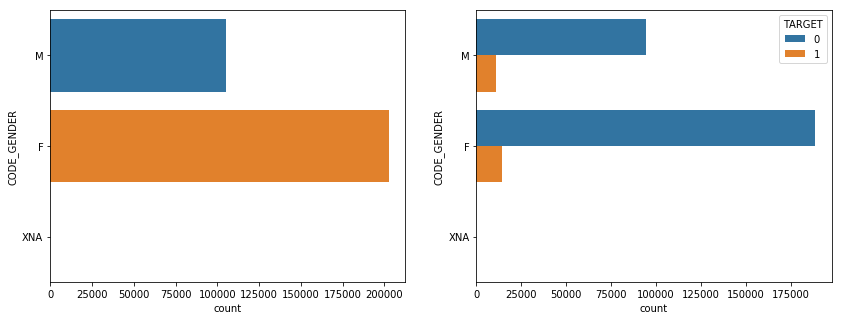

In [28]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.countplot(y='CODE_GENDER', data=df_train, orient='v')
plt.subplot(122)
sns.countplot(y='CODE_GENDER', hue='TARGET', data=df_train, orient='v')

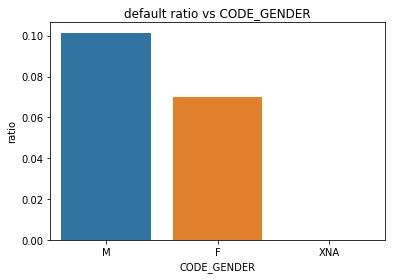

In [29]:
groupby_target_ratio_plot('CODE_GENDER', 'TARGET', df_train)

## 婚姻家庭状况

- 婚姻状态中，married占最大比例，0.638
- 违约风险较高的群体是Civil marriage 和Single / not married


In [32]:
pd.value_counts(df_train.NAME_FAMILY_STATUS) / df_train.shape[0]

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

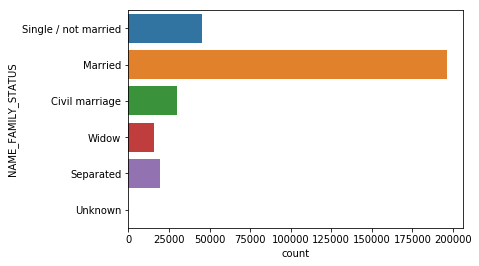

In [33]:
# plt.figure(figsize=(12,5))
# plt.subplot(121)
sns.countplot(y='NAME_FAMILY_STATUS', data=df_train)

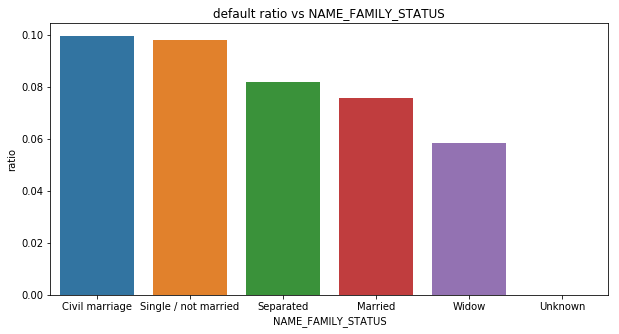

In [35]:
groupby_target_ratio_plot('NAME_FAMILY_STATUS', 'TARGET',df_train, size=(10,5))

## 住房情况

住房拥有：

- 拥有房产的客户比例在0.693
- 是否拥有房产的群体,在违约比例上几乎没有区别

住房类型：

没有独立住房的群体，违约比例高于拥有独立住房的群体。



In [36]:
pd.value_counts(df_train.FLAG_OWN_REALTY)/ df_train.shape[0]

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

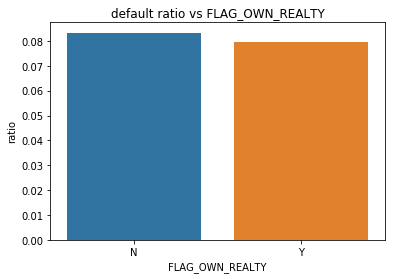

In [37]:
groupby_target_ratio_plot('FLAG_OWN_REALTY', 'TARGET',df_train)

In [38]:
pd.value_counts(df_train.NAME_HOUSING_TYPE)

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

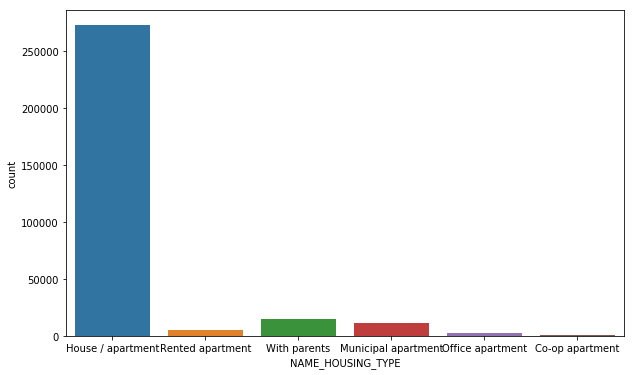

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df_train.NAME_HOUSING_TYPE)

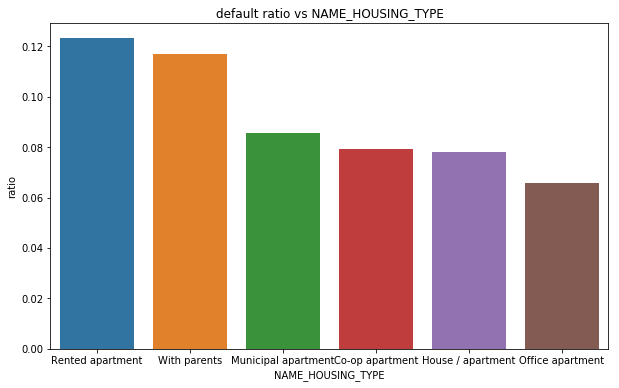

In [40]:
groupby_target_ratio_plot('NAME_HOUSING_TYPE', 'TARGET', df_train, size=(10,6))

## 车辆状况

- 拥有车辆的用户是少数，占0.340
- 对违约比例的影响不显著

In [42]:
pd.value_counts(df_train.FLAG_OWN_CAR)/ df_train.shape[0]

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

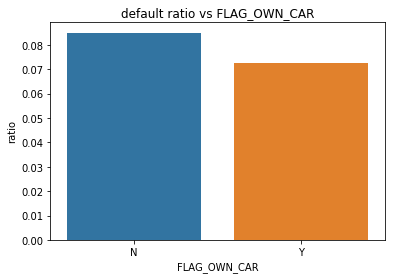

In [43]:
groupby_target_ratio_plot('FLAG_OWN_CAR', 'TARGET',df_train)

## 教育水平

- 客户的总体受教育水平较低，Secondary / secondary special占0.71 
- 教育水平与违约率呈显著相关性，**教育程度越低，违约的比例越高**


In [46]:
pd.value_counts(df_train.NAME_EDUCATION_TYPE)/ df_train.shape[0]
# pd.value_counts(df_train.NAME_EDUCATION_TYPE)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

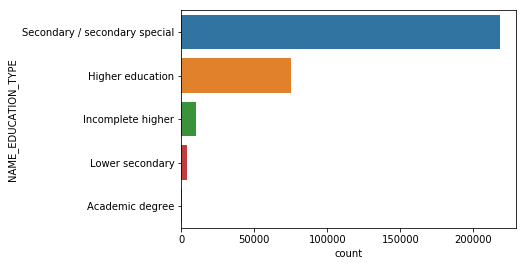

In [47]:
sns.countplot(y='NAME_EDUCATION_TYPE', data=df_train)
# sns.countplot(y='NAME_EDUCATION_TYPE', hue='TARGET', data=df_train)

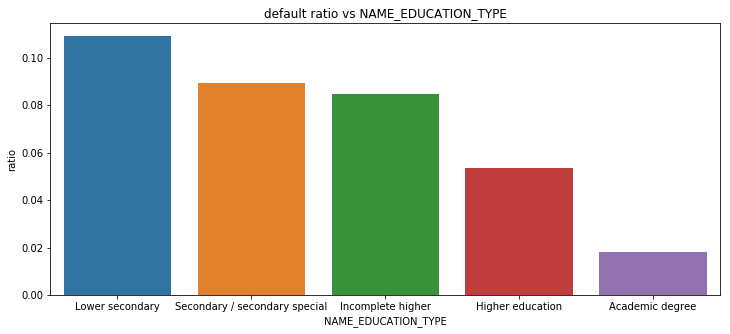

In [48]:
groupby_target_ratio_plot('NAME_EDUCATION_TYPE', 'TARGET', df_train, size=(12,5))

## 收入水平

> Income of the client

收入的数值分布存在问题，收入的中位数为1.47e5，而最大值为1.17e8，相差了3个数量级。
分位数显示，99.9%的用户收入都不超过9e5，因此1e6以上的收入数值对于分布的分析没有意义。

- 有效收入数据的阈值取1e6
- 收入主要分布在1e5-4e5的区间

猜想收入水平与违约可能存在相关性：

- 直接用原始数据分析，相关性仅为-0.003981
- 用有效收入数据，相关性达到-0.0229

可见，对数据进行有效性过滤是必要的。

In [49]:
pd.DataFrame(df_train.AMT_INCOME_TOTAL.describe(percentiles=[0.25,0.5,0.75,0.99,0.999,0.9999]))

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
99%,4.725000e+05
99.9%,9.000000e+05
99.99%,2.250000e+06


In [50]:
index_valid_income = df_train.AMT_INCOME_TOTAL<1e6

In [51]:
df_train.AMT_INCOME_TOTAL[index_valid_income].count()

307261

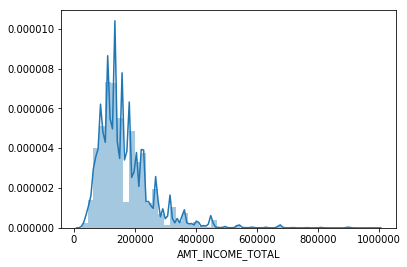

In [52]:
sns.distplot(df_train.AMT_INCOME_TOTAL[index_valid_income])

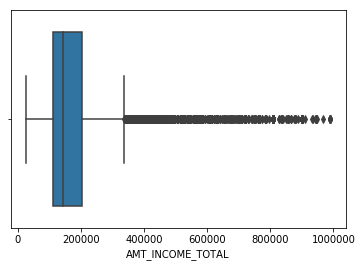

In [53]:
sns.boxplot(df_train.AMT_INCOME_TOTAL[index_valid_income])

将收入水平划cut level，从1e5到4e5，超过4e5的归为一档。

在各收入水平的违约比例图表中，可以看出随着收入水平的增加，违约概率呈明显下降趋势。
当收入水平增加到一定程度（4e5）后，违约比例不再下降。

In [54]:
df_train['INCOME_LEVEL'] = pd.cut(df_train['AMT_INCOME_TOTAL'], list(range(100000, 500000, 50000)) + [1e9])

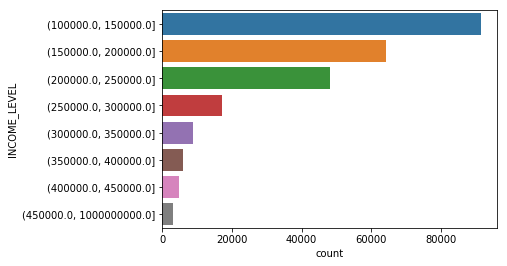

In [55]:
sns.countplot(y='INCOME_LEVEL', data=df_train )

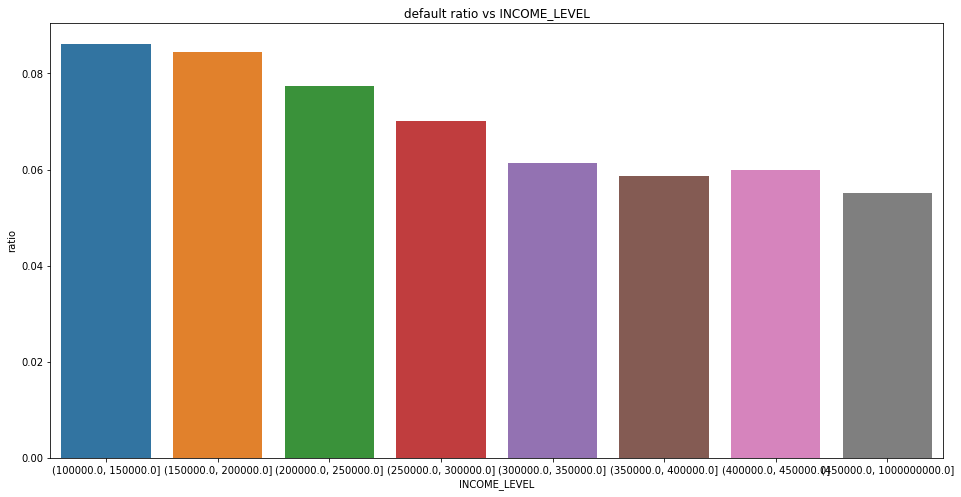

In [56]:
groupby_target_ratio_plot('INCOME_LEVEL', 'TARGET', df_train, size=(16,8))

超高收入群体的收入类型分析，收入最高的5人，职业类型为：

- Working
- Commercial associate

In [58]:
df_train.sort_values(by='AMT_INCOME_TOTAL').tail(10)[['AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE']]

,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
181698,3950059.5,Commercial associate
287463,4500000.0,Working
187833,4500000.0,Working
103006,4500000.0,Working
204564,4500000.0,Working
131127,6750000.0,Working
77768,9000000.0,Working
246858,13500000.0,Commercial associate
203693,18000090.0,Commercial associate
12840,117000000.0,Working


## 教育、收入、违约相关性分析

教育水平的特征为字符类型，需要编码转换成数值型，才能进行分析。

教育与收入、违约的相关性如下：

- 在valid数据中，教育与收入的相关性达到0.243，相关性很高，符合预期
- 教育水平与违约的相关性达到0.054

|     -      |   EDU-INCOME |   EDU-TARGET |
|:-----------|-------------:|-------------:|
| raw_data   |   -0.0962191 |    0.0546986 |
| valid_data |   -0.243327  |    0.0545697 |


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_grade = [ 'Lower secondary','Secondary / secondary special','Incomplete higher', 
               'Higher education', 'Academic degree']
le.fit(label_grade)
df_train['EDUCATION_LEVEL'] = le.transform(df_train.NAME_EDUCATION_TYPE)

In [60]:
df_valid = df_train[index_valid_income]

In [61]:
pd.value_counts(df_train.EDUCATION_LEVEL)

4    218391
1     74863
2     10277
3      3816
0       164
Name: EDUCATION_LEVEL, dtype: int64

In [62]:
df_metric = {}
df_metric['raw_data'] = {}
df_metric['valid_data'] = {}

In [63]:
df_metric['raw_data']['EDU-INCOME'] = df_train['AMT_INCOME_TOTAL'].corr(df_train['EDUCATION_LEVEL'])
df_metric['raw_data']['EDU-TARGET'] = df_train['EDUCATION_LEVEL'].corr(df_train['TARGET'])
df_metric['valid_data']['EDU-INCOME'] = df_valid['AMT_INCOME_TOTAL'].corr(df_valid['EDUCATION_LEVEL'])
df_metric['valid_data']['EDU-TARGET'] = df_valid['EDUCATION_LEVEL'].corr(df_valid['TARGET'])

In [65]:
df_metric = pd.DataFrame(df_metric).T
df_metric
# myutil.df2md(df_metric)

,raw_data,valid_data
EDU-INCOME,-0.096219,-0.243327
EDU-TARGET,0.054699,0.054570


## 职业类型

主要的职业类型有：

- working
- commercial association
- pensioner

类型中，'Unemployed', 'Student', 'Businessman', 'Maternity leave'的数量太少，缺乏统计意义。排除这些极少数类之后，分析结果更加清晰：

违约比例：'Working' > 'Commercial associate' > 'State servant' > 'Pensioner'

不同收入类型的人，违约概率有显著的差别。

各种职业的收入水平来看，Businessman收入中位数远远高于其他的职业类别。

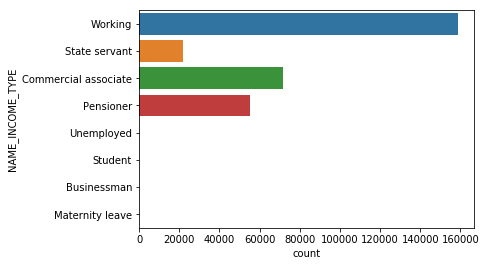

In [66]:
sns.countplot(y='NAME_INCOME_TYPE', data=df_train)

In [68]:
# pd.value_counts(df_train['NAME_INCOME_TYPE']) / df_train.shape[0]

In [71]:
# pd.value_counts(df_train['NAME_INCOME_TYPE'])

In [72]:
income_by_type = df_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].agg(['mean', 'median'])
income_by_type.sort_values(by='median', ascending=False, inplace=True)

In [73]:
income_by_type

,mean,median
NAME_INCOME_TYPE,,
Businessman,652500.000000,495000.0
Commercial associate,202955.327289,180000.0
State servant,179737.969506,157500.0
Student,170500.000000,157500.0
Working,163169.889223,135000.0
Pensioner,136401.292273,117000.0
Maternity leave,140400.000000,90000.0
Unemployed,110536.363636,78750.0


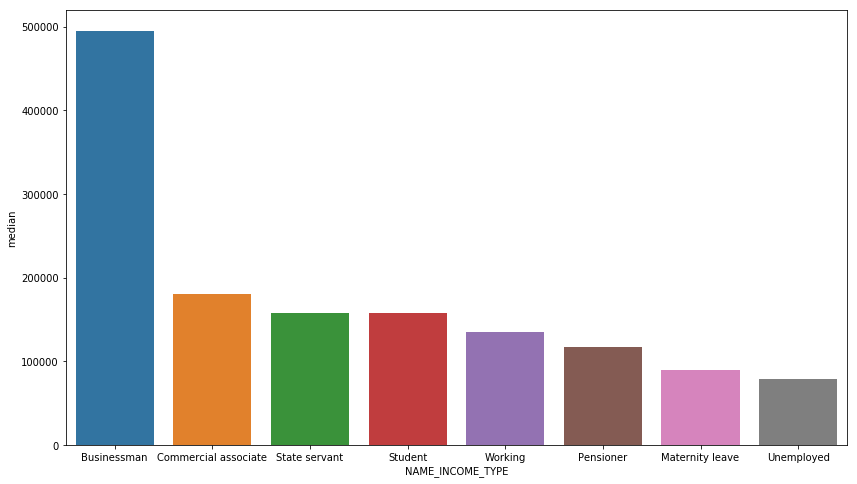

In [74]:
plt.figure(figsize=(14,8))
sns.barplot(x=income_by_type.index, y=income_by_type['median'])

In [76]:
index_main_income_type = df_train.NAME_INCOME_TYPE.apply(lambda x: x in ['Working', 'State servant', 'Commercial associate', 'Pensioner'])

In [79]:
# Businessman收入数据
df_train.AMT_INCOME_TOTAL[df_train.NAME_INCOME_TYPE=='Businessman']

29666      900000.0
29737     2250000.0
87098      180000.0
92166      675000.0
133120     450000.0
145707     225000.0
213668     900000.0
235450     540000.0
254641     225000.0
292267     180000.0
Name: AMT_INCOME_TOTAL, dtype: float64

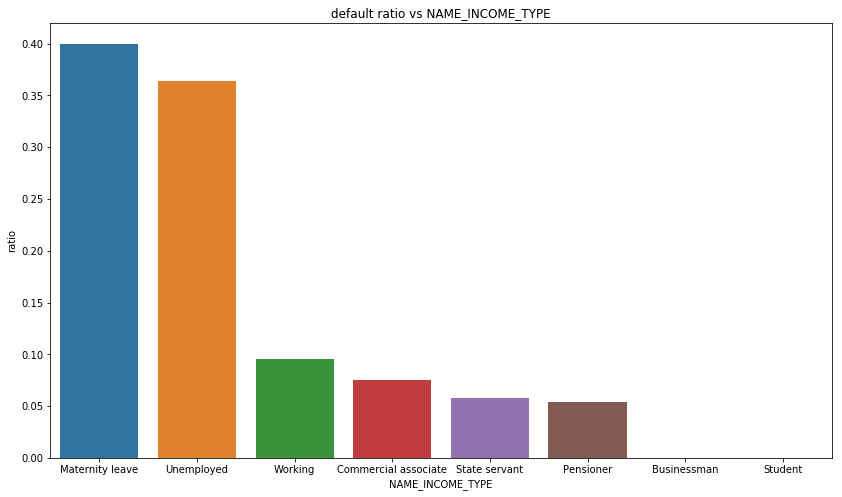

In [80]:
groupby_target_ratio_plot('NAME_INCOME_TYPE', 'TARGET', df_train, size=(14,8))

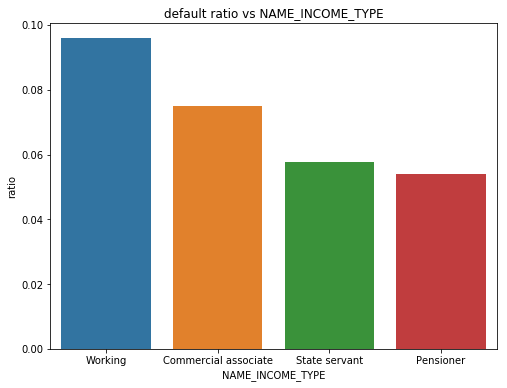

In [81]:
groupby_target_ratio_plot('NAME_INCOME_TYPE', 'TARGET', df_train[index_main_income_type], size=(8,6))

## 年龄

看起来年龄的分布式非常均衡

- 年龄分布从20-70，总体分布较为均匀
- 随着年龄增大，违约比例呈现出**显著的递减**规律


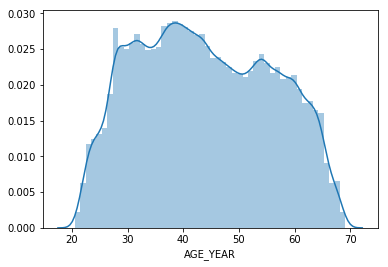

In [82]:
df_train['AGE_YEAR'] = -df_train['DAYS_BIRTH'] / 365
sns.distplot(df_train.AGE_YEAR)

In [83]:
df_train['AGE_YEAR_cut'] = pd.cut(df_train.AGE_YEAR, list(range(20,70,5)))

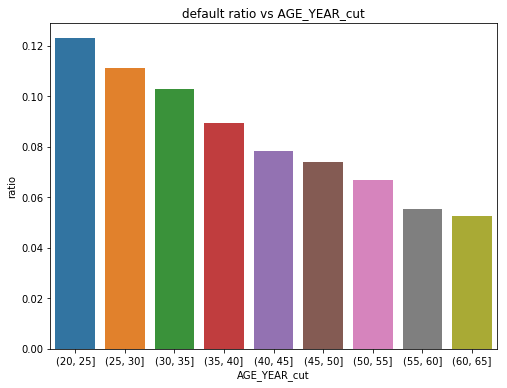

In [84]:
groupby_target_ratio_plot('AGE_YEAR_cut', 'TARGET', df_train, size=(8,6))

In [87]:
# 年龄和收入的相关性
df_train['AGE_YEAR'].corr(df_train['AMT_INCOME_TOTAL'])

-0.02726087258289077

## 工龄长度

由于工龄数据存在大量（5W+）数值超过1000年的异常值，统一重置为-10。

从工龄bin与违约的关系上，可以看出：

- 对于正常工龄数据，随着工龄增加，违约率显著下降
- 工龄异常值的群体，违约率低于平均水平

显著的区分度。

In [88]:
df_train['YEARS_EMPLOYED'] = -df_train.DAYS_EMPLOYED / 365

In [89]:
df_train[['DAYS_EMPLOYED', 'YEARS_EMPLOYED']].describe()

,DAYS_EMPLOYED,YEARS_EMPLOYED
count,307511.000000,307511.000000
mean,63815.045904,-174.835742
std,141275.766519,387.056895
min,-17912.000000,-1000.665753
25%,-2760.000000,0.791781
50%,-1213.000000,3.323288
75%,-289.000000,7.561644
max,365243.000000,49.073973


In [90]:
df_train['YEARS_EMPLOYED'][df_train.YEARS_EMPLOYED<0] = -10

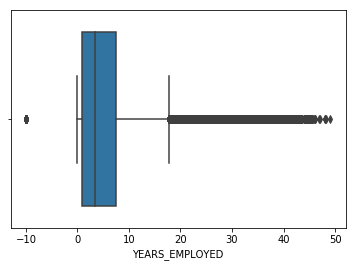

In [91]:
sns.boxplot(df_train.YEARS_EMPLOYED)

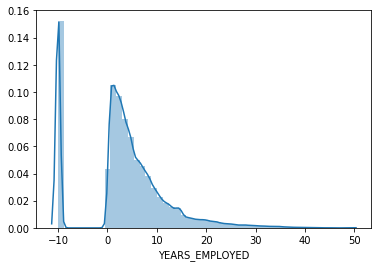

In [92]:
sns.distplot(df_train.YEARS_EMPLOYED)

In [93]:
df_train['YEARS_EMPLOYED_cut'] = pd.cut(df_train.YEARS_EMPLOYED, list(range(-15,65,10)))

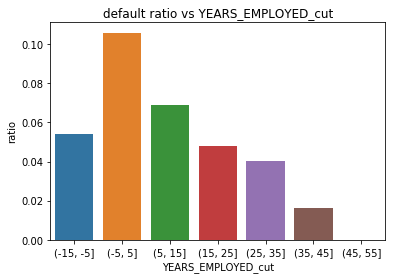

In [94]:
groupby_target_ratio_plot('YEARS_EMPLOYED_cut','TARGET', df_train)

## 工作类型和职业名称

能看出的信息量不多：

- ORGANIZATION_TYPE有长尾的特点，top的类型是BUSINESS ENTITY TYPE3,XNA,SELF_EMPLOYED
- OCCUPATION_TYPE较为集中，Labors, Sales staff, Core Staff

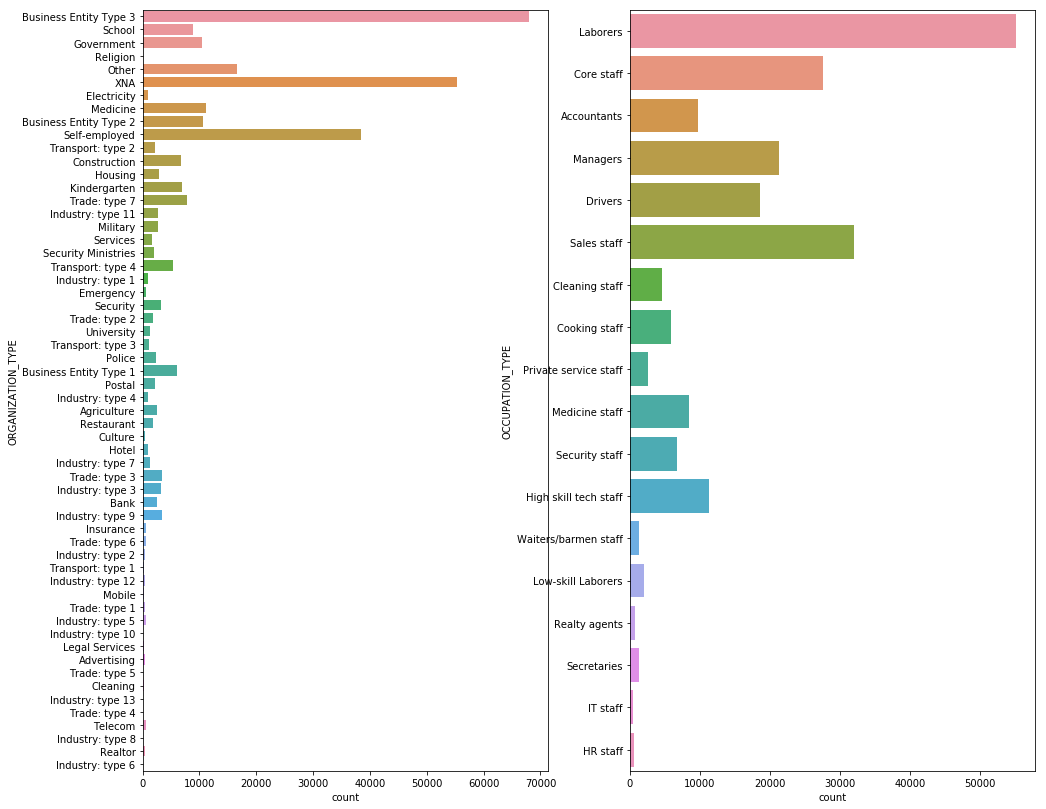

In [85]:
plt.figure(figsize=(16,14))
plt.subplot(121)
sns.countplot(data=df_train, y='ORGANIZATION_TYPE')
plt.subplot(122)
sns.countplot(data=df_train, y='OCCUPATION_TYPE')

# 贷款信息分析

## 贷款金额

>这是什么货币，为什么数字这么大？
1 捷克克朗 等于 0.30 人民币
但根据捷克的人均GDP和收入水平，远远达不到。

- 贷款总额偏态分布，中位数在5.13e5
- 年度还款额的中位数在2.49e4
- 还款年限的中位数在20年

还款年限非常长，最大的达到45年，看起来像是房贷。但从用户的住房拥有程度来看，不应该是房贷。

注意，此处的还款年限是直接用总贷款额除以年度还款额得到的，不准确。

贷款金额越大，违约概率越低，这一点反常识。

In [124]:
df_train['TERMS'] = df_train.AMT_CREDIT / df_train.AMT_ANNUITY

In [125]:
df_train[['AMT_CREDIT', 'AMT_ANNUITY', 'TERMS']].describe()

,AMT_CREDIT,AMT_ANNUITY,TERMS
count,3.075110e+05,307499.000000,307499.000000
mean,5.990260e+05,27108.573909,21.612322
std,4.024908e+05,14493.737315,7.823823
min,4.500000e+04,1615.500000,8.036674
25%,2.700000e+05,16524.000000,15.614496
50%,5.135310e+05,24903.000000,20.000000
75%,8.086500e+05,34596.000000,27.099985
max,4.050000e+06,258025.500000,45.305079


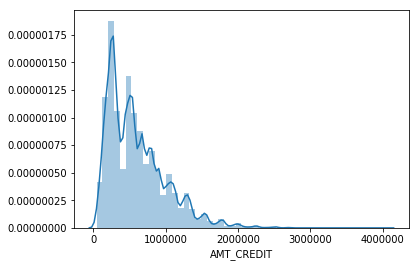

In [126]:
sns.distplot(df_train.AMT_CREDIT)

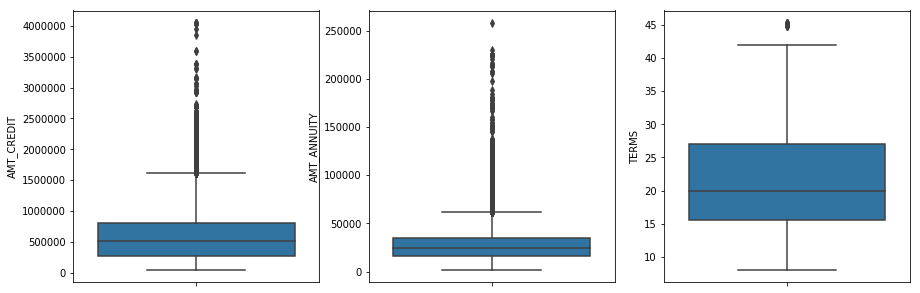

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(y='AMT_CREDIT', data=df_train)
plt.subplot(132)
sns.boxplot(y='AMT_ANNUITY', data=df_train)
plt.subplot(133)
sns.boxplot(data=df_train, y='TERMS')

In [128]:
df_train['AMT_CREDIT_cut'] = pd.cut(df_train.AMT_CREDIT, list(range(0, 2500000,500000)) + [4000000]) 
df_train['AMT_ANNUITY_cut'] = pd.cut(df_train.AMT_CREDIT, list(range(0, 120000,20000)) + [300000]) 
df_train['TERMS_cut'] = pd.cut(df_train.TERMS, list(range(5, 35, 5)) + [50]) 

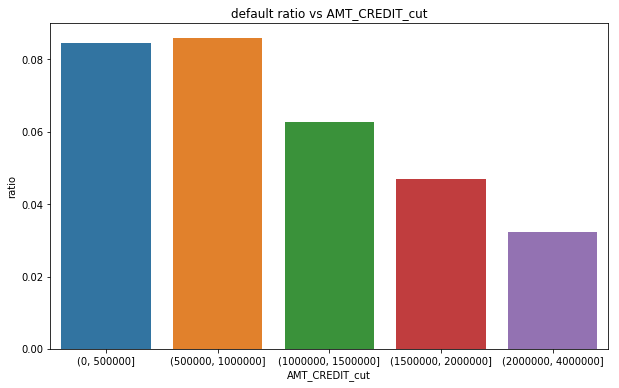

In [129]:
groupby_target_ratio_plot('AMT_CREDIT_cut','TARGET', df_train, size=(10,6))

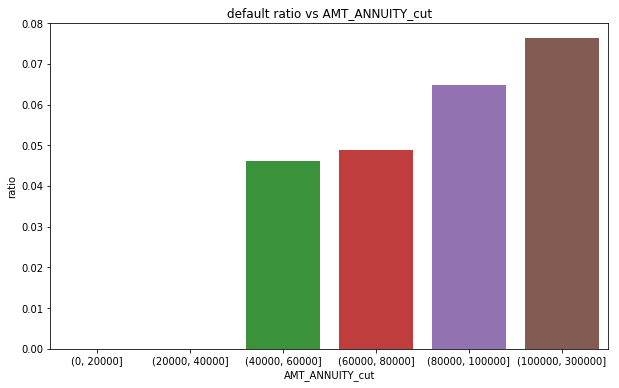

In [130]:
groupby_target_ratio_plot('AMT_ANNUITY_cut','TARGET', df_train, size=(10,6))

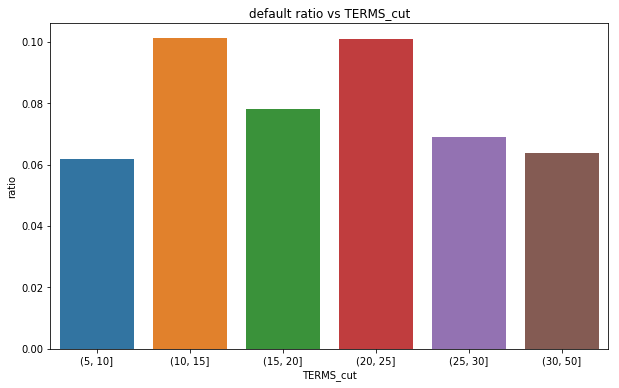

In [131]:
groupby_target_ratio_plot('TERMS_cut','TARGET', df_train, size=(10,6))

## 还款/收入比分析

- 还款/收入比分布在的0-2之间，大多数在0-0.75
- 比值在1之内的情况下，违约比例没有显著的变化，超过1之后，违约比例显著增大。

In [150]:
df_train['INSTALL_TO_INCOME'] = df_train.AMT_ANNUITY / df_train.AMT_INCOME_TOTAL 

In [151]:
df_train.INSTALL_TO_INCOME.fillna(0, inplace=True)

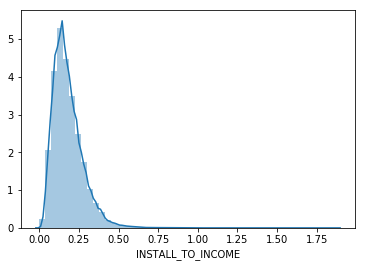

In [152]:
sns.distplot(df_train.INSTALL_TO_INCOME)

In [154]:
df_train.INSTALL_TO_INCOME.describe()

count    307511.000000
mean          0.180923
std           0.094579
min           0.000000
25%           0.114776
50%           0.162833
75%           0.229064
max           1.875965
Name: INSTALL_TO_INCOME, dtype: float64

In [171]:
df_train['INSTALL_TO_INCOME_cut'] = pd.cut(df_train['INSTALL_TO_INCOME'], [0, 0.1, 0.2,0.3,0.4,0.5, 1,2])

In [172]:
pd.value_counts(df_train['INSTALL_TO_INCOME_cut'])

(0.1, 0.2]    145231
(0.2, 0.3]     73742
(0.0, 0.1]     57210
(0.3, 0.4]     23407
(0.4, 0.5]      5379
(0.5, 1.0]      2497
(1.0, 2.0]        33
Name: INSTALL_TO_INCOME_cut, dtype: int64

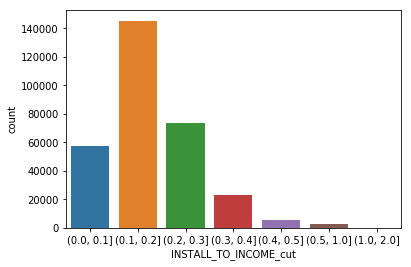

In [173]:
sns.countplot(df_train['INSTALL_TO_INCOME_cut'])

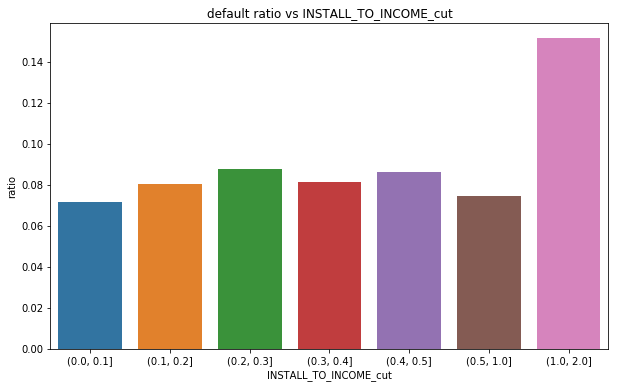

In [175]:
groupby_target_ratio_plot('INSTALL_TO_INCOME_cut','TARGET', df_train, size=(10,6))

## 从注册到申请的时间

从注册时间来看，注册时间越早，越是老客户，违约的概率越低。

In [176]:
df_train['YEARS_REGISTRATION'] = -df_train.DAYS_REGISTRATION / 365

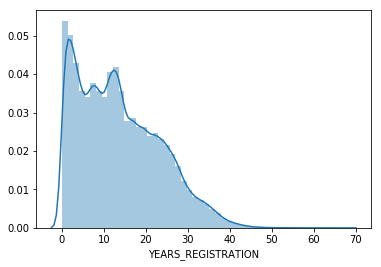

In [177]:
sns.distplot(df_train.YEARS_REGISTRATION)

In [178]:
df_train['YEARS_REGISTRATION_cut'] = pd.cut(df_train.YEARS_REGISTRATION, [0,5,10,20,30,40,70])

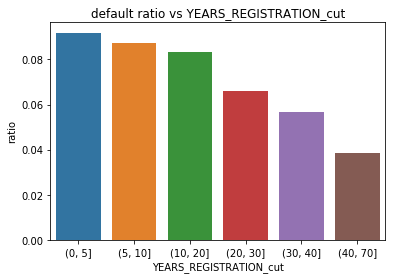

In [179]:
groupby_target_ratio_plot('YEARS_REGISTRATION_cut', 'TARGET', df_train)

In [180]:
df_train['YEARS_REGISTRATION'].corr(df_train['TARGET'])

-0.041974862831417076

# 新老客户分析

In [185]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


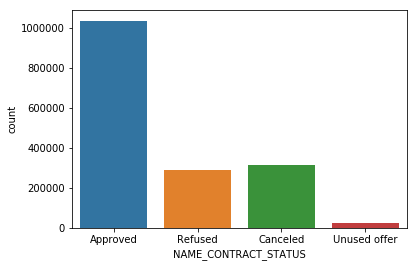

In [186]:
sns.countplot(df_prev.NAME_CONTRACT_STATUS)

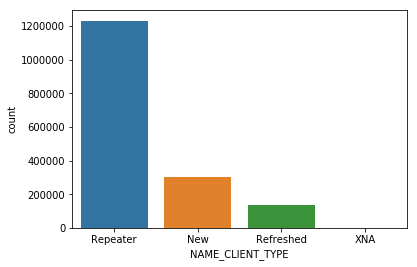

In [187]:
sns.countplot(df_prev.NAME_CLIENT_TYPE)